# Supervised Learning with $k$-NN

## Lecture 2

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

## Definition of supervised learning

Supervised learning is a type of machine learning in which a model is trained on labeled data. This means that the data used to train the model includes both input data and corresponding correct output labels. The goal of supervised learning is to use the labeled training data to learn the relationship between the input and output data, and then make predictions on new, unseen data.

During the training phase, the model is presented with the input data and the corresponding correct output labels. The model makes predictions based on the input data, and then compares its predictions to the correct labels to determine how accurate they are. The model is then adjusted, or "trained", based on the error between its predictions and the correct labels. This process is repeated multiple times, using different portions of the training data or different combinations of training and validation data, until the model reaches a satisfactory level of accuracy. Once the model is trained, it can be used to make predictions on new, unseen data.

## Examples of supervised learning problems

1. **Classification**: The goal is to predict a discrete class label (e.g., "spam" or "not spam" for an email classification problem).
2. **Regression**: The goal is to predict a continuous numerical value (e.g., the price of a house based on its characteristics).
3. **Forecasting**: The goal is to predict future values of a given time series (e.g., stock prices or weather data).
4. **Object recognition**: The goal is to classify objects in images or videos based on their characteristics.
5. **Speech recognition**: The goal is to transcribe spoken language into written text.

## Classification with $k$-nearest neighbors

The k-nearest neighbors ($k$-NN) algorithm is a simple and widely used machine learning technique for classification. The basic idea is to find the $k$ training examples that are closest (i.e., most similar) to a given test point, and then assign the label or value of the majority of those $k$ examples to the test point.

The most common way to measure the similarity between two points is to use the Euclidean distance, which is defined as the square root of the sum of the squared differences of their coordinates:

$$d(x,y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + ... + (x_n - y_n)^2}$$

where $x$ and $y$ are two points in $n$-dimensional space, and $x_i$ and $y_i$ are the $i$-th coordinates of $x$ and $y$.

In a $k$-NN classification problem, given a test point $x$ and a set of training points with labels, the $k$-NN algorithm works as follows:

1. For each training point, calculate the distance between it and $x$.
2. Sort the training points by increasing distance to $x$.
3. Select the $k$ training points that are closest to $x$.
4. Assign the label of the majority of the $k$ selected points to $x$.

This simple algorithm can be very effective for some types of problems, especially if the decision boundary between classes is relatively smooth and regular. However, it can be sensitive to the choice of $k$ and the presence of noisy or irrelevant features in the data.

Let's use $k$-nearest neighbors on the iris datataset.

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [6]:
# Inspect the training data and labels (10 first samples)
X_train[:10], y_train[:10]

(array([[4.7, 3.2, 1.6, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [4.9, 2.5, 4.5, 1.7],
        [5.1, 2.5, 3. , 1.1],
        [6.7, 3.1, 5.6, 2.4],
        [4.9, 3.6, 1.4, 0.1],
        [6.9, 3.1, 5.4, 2.1],
        [4.8, 3. , 1.4, 0.3],
        [5.8, 2.7, 3.9, 1.2],
        [6. , 2.7, 5.1, 1.6]]),
 array([0, 0, 2, 1, 2, 0, 2, 0, 1, 1]))

### $k$-NN from scratch

We define two helper functions: `euclidean_distance` which calculates the euclidean distance between two points, and `predict_label` which finds the most common label among the k nearest neighbors of a test point in the training set. Finally, we test the classifier on the first test point with $k = 3$, and compare the predicted label to the true label.

In [7]:
import numpy as np

def euclidean_distance(x, y):
    """Calculate the euclidean distance between two points"""
    return np.sqrt(np.sum((x - y)**2))

def predict(X_train, y_train, X_test, k):
    """Find the k nearest neighbors of x_test in X_train"""
    distances = [euclidean_distance(X_test, x) for x in X_train]
    k_nearest = np.argsort(distances)[:k]
    return y_train[k_nearest]

def predict_label(X_train, y_train, X_test, k):
    """Find the most common label among the k nearest neighbors of X_test in X_train"""
    return np.bincount(predict(X_train, y_train, X_test, k)).argmax()

# Test the classifier on the first test point with k = 3
print("True label:", y_test[0])
print("Predicted label:", predict_label(X_train, y_train, X_test[0], 3))

True label: 1
Predicted label: 1


In [8]:
# Make predictions on the whole test set
y_pred = [predict_label(X_train, y_train, x, 3) for x in X_test]

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)

# Print the accuracy
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 93.33333333333333%


## Vizualize a test point on some simulated data with 2 features

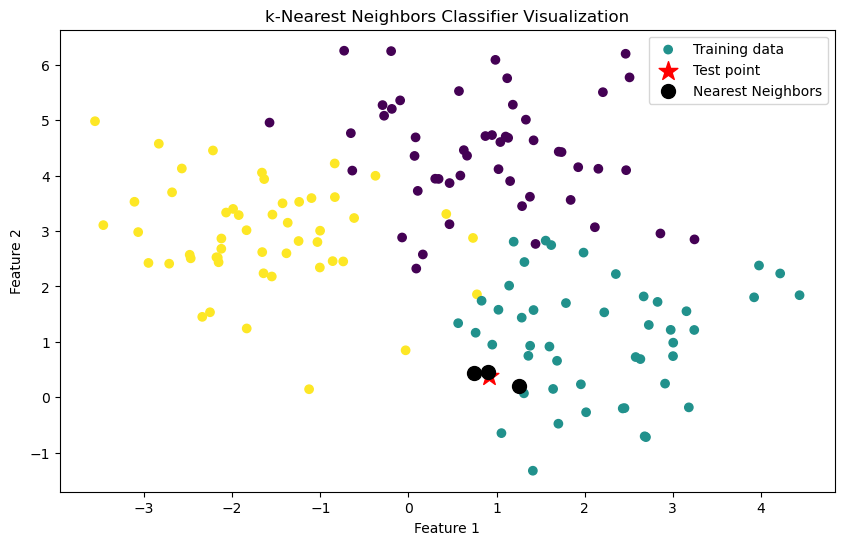

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create simulated data for visualization
np.random.seed(0)
X_train_sim, y_train_sim = make_blobs(n_samples=150, centers=3, n_features=2)
X_test_sim = np.array([np.random.uniform(X_train_sim.min(), X_train_sim.max(), 2)])

# Find the 3 nearest neighbors
distances = [euclidean_distance(X_test_sim[0], x) for x in X_train_sim]
k_nearest = np.argsort(distances)[:3]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train_sim[:, 0], X_train_sim[:, 1], c=y_train_sim, cmap='viridis', label='Training data')
plt.scatter(X_test_sim[:, 0], X_test_sim[:, 1], c='red', marker='*', s=200, label='Test point')
plt.scatter(X_train_sim[k_nearest][:, 0], X_train_sim[k_nearest][:, 1], c='black', marker='o', s=100, label='Nearest Neighbors')

plt.title('k-Nearest Neighbors Classifier Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Using scikit-learn

We create a $k$-NN classifier with 3 neighbors and fit it to the training data using the `.fit()` method. We make predictions on the test data using the `.predict()` method, and print the accuracy of the classifier by comparing the predicted labels to the true labels.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Print the accuracy of the classifier
print(f"Accuracy: {knn.score(X_test, y_test) * 100}%")

Accuracy: 93.33333333333333%
